In [48]:
import warnings

warnings.filterwarnings("ignore")

In [49]:
import pandas as pd
import yfinance as yf

# ------------------------------------------------------------------
# 1) Get today’s S&P 500 constituents straight from Wikipedia
# ------------------------------------------------------------------
wiki_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
table = pd.read_html(wiki_url, header=0)[0] 
tickers = (table["Symbol"]
           .str.replace(".", "-", regex=False)
           .tolist())

# ------------------------------------------------------------------
# 2) Pull month-end prices in one bulk request
# ------------------------------------------------------------------
start, end = "2015-01-01", "2025-05-31"
data = yf.download(
    tickers,
    start=start,
    end=end,
    interval="1mo",         # monthly bars
    group_by="ticker",      # ⇢ multi-index columns
    threads=True,
    progress=False,
    auto_adjust=True        # already split/dividend-adjusted
)

data

Ticker            META                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2015-01-01   78.151257   78.817600   73.138755   75.495827  546210700   
2015-02-01   75.694735   80.926038   73.049245   78.539131  475148700   
2015-03-01   78.568961   85.600385   76.838456   81.771393  575349900   
2015-04-01   82.049878   85.123015   77.892683   78.340225  542124600   
2015-05-01   78.807642   81.403402   76.371013   78.757919  421870700   
...                ...         ...         ...         ...        ...   
2025-01-01  588.742755  709.612140  586.845940  688.037964  317942200   
2025-02-01  674.789959  739.682251  640.796393  667.092773  298418700   
2025-03-01  672.563647  680.121110  552.383122  575.404907  363413500   
2025-04-01  570.401115  592.204284  479.431076  548.577881  451371800   
2025-05-01  591.624815  662.160510  570.061389  646.992188  292479500   

Ticker            FFIV                                                ...  \
Price             Open        High         Low       Close    Volume  ...   
Date                                                                  ...   
2015-01-01  131.720001  132.990005  108.599998  111.620003  32611900  ...   
2015-02-01  110.290001  120.660004  109.190002  118.120003  18150600  ...   
2015-03-01  118.559998  119.970001  111.070000  114.940002  21477500  ...   
2015-04-01  114.610001  126.180000  111.330002  122.019997  29690700  ...   
2015-05-01  122.279999  128.080002  121.279999  125.690002  15168400  ...   
...                ...         ...         ...         ...       ...  ...   
2025-01-01  252.000000  308.000000  249.679993  297.260010  13155200  ...   
2025-02-01  293.399994  313.000000  285.209991  292.429993  10635900  ...   
2025-03-01  295.459991  298.540009  255.649994  266.269989  12489600  ...   
2025-04-01  265.369995  274.540009  227.039993  264.739990  13475700  ...   
2025-05-01  264.540009  290.339996  260.690002  285.380005   9411600  ...   

Ticker            HRL                                                    WAB  \
Price            Open       High        Low      Close    Volume        Open   
Date                                                                           
2015-01-01  20.533392  21.289224  19.742133  20.163351  34218800   82.557547   
2015-02-01  19.943039  23.333474  19.832266  23.147533  40670200   78.984061   
2015-03-01  23.147536  23.214792  21.569026  22.490812  36723200   89.162184   
2015-04-01  22.490806  23.191048  21.422642  21.501764  32677000   89.643376   
2015-05-01  21.607387  23.586143  21.607387  22.735834  43337400   90.483099   
...               ...        ...        ...        ...       ...         ...   
2025-01-01  30.887721  31.338924  28.563051  29.406601  56454900  191.070759   
2025-02-01  29.485167  29.663445  27.326025  28.356073  62099000  203.199706   
2025-03-01  28.356073  30.931197  28.207508  30.643972  66745500  186.865331   
2025-04-01  30.782632  31.763160  28.504639  29.613922  63821400  180.033909   
2025-05-01  29.559999  30.860001  28.770000  30.680000  67397200  184.767955   

Ticker                                                    
Price             High         Low       Close    Volume  
Date                                                      
2015-01-01   82.906411   76.570335   78.682358   8895400  
2015-02-01   91.609072   78.031770   89.468758   9907000  
2015-03-01   91.473794   85.520215   89.643379  11222500  
2015-04-01   99.163440   88.209229   88.737602  10338500  
2015-05-01   96.898998   90.247221   94.634567  11042200  
...                ...         ...         ...       ...  
2025-01-01  210.341424  186.422657  207.388977  17821600  
2025-02-01  208.855224  179.590161  184.886597  28025800  
2025-03-01  189.971431  172.363539  181.122543  24424200  
2025-04-01  191.499521  151.619594  184.508301  22368300  
2025-05-01

In [50]:
# keep only the raw Close column
df = data.xs("Close", level=1, axis=1)      # <- level=1 is the price field

df.head()

Ticker,META,FFIV,IR,CCL,DVN,RJF,CAH,OXY,NEE,JNJ,...,MAA,MA,JBHT,NKE,PFG,HSY,SBAC,CMS,HRL,WAB
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,75.495827,111.620003,NaN,37.508083,41.590202,30.151218,62.035099,58.087547,20.810244,74.743431,...,55.005611,76.898315,72.124931,40.637493,31.991587,79.838417,108.928833,27.535238,20.163351,78.682358
2015-02-01,78.539131,118.120003,NaN,37.533688,42.501083,32.735455,65.614449,56.548225,19.709148,76.512383,...,50.738552,84.654594,77.461143,42.782803,34.881943,81.064758,116.405441,25.637768,23.147533,89.468758
2015-03-01,81.771393,114.940002,NaN,41.055714,41.617798,32.534901,67.314674,53.004875,19.966471,75.612381,...,54.099171,81.141800,77.571228,44.325043,35.018284,79.218170,109.302177,25.673971,22.490812,89.643379
2015-04-01,78.340225,122.019997,NaN,37.734528,47.268375,32.494396,63.133011,58.705612,19.367769,74.560112,...,52.236820,84.729713,79.206223,43.666775,35.098160,72.160652,108.107452,24.953247,21.501764,88.737602
2015-05-01,78.757919,125.690002,NaN,39.759850,45.196350,33.408367,65.999939,57.305790,19.638338,75.266632,...,54.032890,86.814232,76.317734,44.917034,35.489517,72.898582,104.364449,25.107687,22.735834,94.634567


In [51]:
na_counts = df.isna().sum()

na_counts = na_counts[na_counts > 0]

num_tickers_with_missing = len(na_counts)  

num_tickers_with_missing

34

In [52]:
df = df.dropna(axis=1)

df.head()

Ticker,META,FFIV,CCL,DVN,RJF,CAH,OXY,NEE,JNJ,MOH,...,MAA,MA,JBHT,NKE,PFG,HSY,SBAC,CMS,HRL,WAB
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,75.495827,111.620003,37.508083,41.590202,30.151218,62.035099,58.087547,20.810244,74.743431,50.910000,...,55.005611,76.898315,72.124931,40.637493,31.991587,79.838417,108.928833,27.535238,20.163351,78.682358
2015-02-01,78.539131,118.120003,37.533688,42.501083,32.735455,65.614449,56.548225,19.709148,76.512383,63.689999,...,50.738552,84.654594,77.461143,42.782803,34.881943,81.064758,116.405441,25.637768,23.147533,89.468758
2015-03-01,81.771393,114.940002,41.055714,41.617798,32.534901,67.314674,53.004875,19.966471,75.612381,67.290001,...,54.099171,81.141800,77.571228,44.325043,35.018284,79.218170,109.302177,25.673971,22.490812,89.643379
2015-04-01,78.340225,122.019997,37.734528,47.268375,32.494396,63.133011,58.705612,19.367769,74.560112,59.230000,...,52.236820,84.729713,79.206223,43.666775,35.098160,72.160652,108.107452,24.953247,21.501764,88.737602
2015-05-01,78.757919,125.690002,39.759850,45.196350,33.408367,65.999939,57.305790,19.638338,75.266632,72.739998,...,54.032890,86.814232,76.317734,44.917034,35.489517,72.898582,104.364449,25.107687,22.735834,94.634567


In [57]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# z-normalise each ticker (k-Shape assumes mean-0/var-1)
scaler  = TimeSeriesScalerMeanVariance()
X       = scaler.fit_transform(df.values.T)   # shape: (n_tickers, n_months)


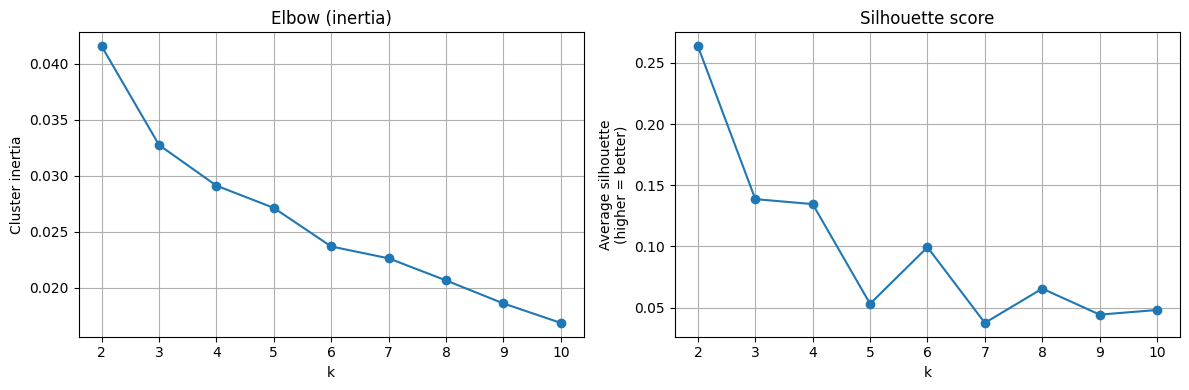

In [60]:
# ------------------------------------------------------------
# 1. Re-use X from the elbow step
#     (X.shape == (n_tickers, n_months); already z-normalised)
# ------------------------------------------------------------
from tslearn.clustering import KShape
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

k_values     = range(2, 11)
inertias     = []      # re-collect, handy to keep them together
silhouettes  = []

for k in k_values:
    ks = KShape(n_clusters=k, random_state=42, n_init=10).fit(X)
    inertias.append(ks.inertia_)
    
    # sklearn's silhouette_score needs 2-D array (n_samples × n_features)
    labels = ks.labels_
    flatX  = X.reshape(X.shape[0], -1)     # flatten the time axis
    sil    = silhouette_score(flatX, labels, metric="euclidean")
    silhouettes.append(sil)

# ------------------------------------------------------------
# 2. Plot inertia and silhouette side-by-side
# ------------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Arm / elbow
ax[0].plot(k_values, inertias, marker='o')
ax[0].set_title("Elbow (inertia)")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Cluster inertia")

# Silhouette
ax[1].plot(k_values, silhouettes, marker='o')
ax[1].set_title("Silhouette score")
ax[1].set_xlabel("k")
ax[1].set_ylabel("Average silhouette\n(higher = better)")

for a in ax: a.grid(True)
plt.tight_layout()
plt.show()


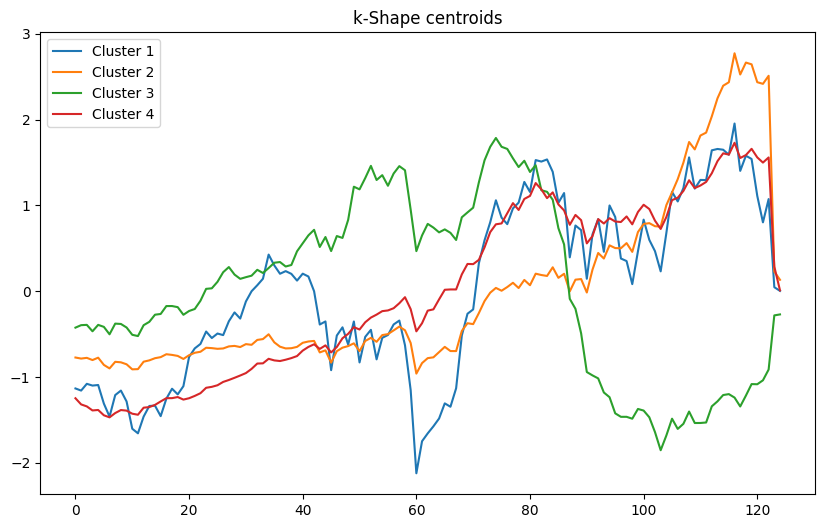

In [67]:
best_k = 4            # example
ks = KShape(n_clusters=best_k, random_state=42, n_init=10).fit(X)

plt.figure(figsize=(10, 6))
for idx, centroid in enumerate(ks.cluster_centers_):
    plt.plot(centroid.ravel(), label=f"Cluster {idx + 1}")
plt.legend(); plt.title("k-Shape centroids");


In [69]:
# 1.  Build a tidy table ticker → cluster
cluster_map = pd.Series(ks.labels_, index=df.columns, name="cluster")

# 2.  Quick peek
print(cluster_map.head())

Ticker
META    1
FFIV    0
CCL     2
DVN     0
RJF     1
Name: cluster, dtype: int64


In [70]:
for c in sorted(cluster_map.unique()):
    members = cluster_map[cluster_map == c].index.tolist()
    print(f"\nCluster {c + 1}  (n = {len(members)})")
    print(", ".join(members))



Cluster 1  (n = 41)
FFIV, DVN, C, USB, EOG, NTRS, CTRA, GM, HII, EXPE, TFC, CAG, BG, TXT, AOS, F, MTB, SCHW, CPB, HST, CTSH, EMN, WY, RF, CFG, STT, LYB, MGM, PRU, LKQ, FITB, DD, PNC, CNP, HBAN, LVS, FDX, COF, KEY, IP, PFG

Cluster 2  (n = 173)
META, RJF, CAH, TJX, L, TMUS, T, ARE, OMC, CHTR, VTR, SYF, CB, SJM, NWS, MSI, BMY, JBL, CMG, KIM, VMC, HLT, BLDR, AXP, TRV, ETN, DIS, MAR, FSLR, HUBB, INCY, RTX, KKR, KMI, ADM, BIIB, EPAM, PANW, SWKS, ALL, CL, SNA, PM, AMP, WYNN, KMX, RCL, ERIE, COST, PH, BRK-B, GS, COP, ORCL, RSG, MET, NWSA, TT, XOM, NFLX, WRB, CVX, JPM, KLAC, BSX, AXON, URI, SMCI, WELL, CTAS, BA, MDT, PNW, BK, CI, PHM, PGR, LLY, PFE, ANET, ENPH, CAT, ALGN, CCI, LII, AZO, WMT, EG, GWW, TDG, MPC, MLM, IRM, WFC, APO, VLO, AJG, MKTX, REGN, PWR, PPL, PKG, AIG, LEN, RL, AFL, PCAR, NVR, NTAP, TPL, JNPR, AVGO, STLD, FANG, ALB, PSX, K, APTV, MOS, VRTX, EIX, HES, ABBV, WSM, DG, ACGL, GPN, TSN, OKE, MO, APH, FICO, NI, GD, DECK, ZBH, CBOE, WMB, NUE, CZR, BRO, SPG, BKR, GNRC, FI, COR, DHI,